# 1. emmc固件烧录

由于Jetson Nano预设的运行是通过emmc，虽然在工业应用等场景的性能表现更好（PCIe），但不利于初学者的学习及系统的移植，故我们采用SD卡的方式进行开发。所以为是系统运行在SD卡上，需要烧录emmc的引导固件。这里提供了两种方法分别对应虚拟机用户和双系统用户。

 - **a. 安装新的虚拟机并进行烧录**\
$\quad$具体操作见:
>/UDISK/Jetson Nano TF 卡版本国产套件客户资料 2022-3-9/6.视频教程/4.Jetson Nano 国产开发套件自定义系统烧入.mp4
    
 - **b. 使用已有Linux系统的进行烧录**\
$\quad$将下述文件复制到自己的Linux系统主机上
>/UDISK/Jetson Nano TF 卡版本国产套件客户资料 2022-3-9/5.配置文件/入门套件、机器人EMMC向导补丁/Linux_for_Tegra.tar.gz\

$\quad$并执行`tar zxvf Linux_for_Tegra.tar.gz`解压文件。之后的步骤与上述视频中相同，这里不再赘述。


# 2. 系统镜像烧录 

$\quad$JetPack SDK 包含适用于 Linux 操作系统的最新 Linux 驱动包 (L4T) 以及用于深度学习、计算机视觉、加速计算和多媒体的 CUDA-X 加速库与 API。它还包含用于主机和开发者套件的示例、文档和开发者工具，并支持更高级别的 SDK，例如用于直播视频分析的 DeepStream 以及用于机器人的 Isaac。\
$\quad$更多信息可以在NVIDIA获得https://developer.nvidia.com/embedded/jetson-nano-developer-kit

 - **烧录系统镜像**\
$\quad$具体操作见:
>/UDISK/Jetson Nano TF 卡版本国产套件客户资料 2022-3-9/6.视频教程/4.Jetson Nano 国产开发套件自定义系统烧入.mp4
 - **扩容**\
 $\quad$由于系统烧录后，有一部分SD卡上存储空间未全部被分区，所以需要调整分区。\
 $\quad$具体操作见:
 >/UDISK/Jetson Nano TF 卡版本国产套件客户资料 2022-3-9/6.视频教程/3.Jetson Nanno 国产开发套件扩充磁盘空间.mp4

# 3. SSH开发

$\quad$在 Linux 系统上 SSH 是非常常用的工具，通过 SSH Client 我们可以连接到运行了 SSH Server 的远程机器上。SSH Client 的基本使用方法是：\
$\quad$`ssh user@remote -p port`
 - user 是你在远程机器上的用户名，如果不指定的话默认为当前用户
 - remote 是远程机器的地址，可以是 IP，域名，或者是后面会提到的别名
 - port 是 SSH Server 监听的端口，如果不指定的话就为默认值 22
 在系统镜像中已经安装好了SSH服务，直接进行使用即可。在Jetson Nano上我们连接SSH有两种连接方式：
 - **a.通过WLAN连接**\
     
     首先,将USB无线网卡插入到Jetson Nano，并连接WIFI，使Client与Server处于同一局域网内。\
     将显示器与键盘外接到Jetson Nano上，键入`Ctrl + Alt + T`打开Terminal，使用`ifconfig`来查看设备的ip addr(wlan)。\
     在Client上使用`ssh nvidia@ip addr`,并输入密码，即可连接到Jetson Nano的Terminal。
     >nvidia@nvidia-desktop:~$ #连接成功
         
     * 注意：每台设备首次接入到新路由器的局域网内，路由器会为其分配新的ip addr。分配到的ip addr在之后会固定下来不变，保存好即可。 
     

 - **b.通过串口使用Ethernet Protocol连接**\
 $\quad$Jetson Nano提供了串口的SSH连接方式，并预设了串口的使用了Ethernet Protocol。
     首先，将CLient与Server间用MicroUSB进行SERIAL相连接。
     
 在Client上使用`ssh nvidia@ip addr`,并输入密码，即可连接到Jetson Nano的Terminal。
     >nvidia@nvidia-desktop:~$ #连接成功
  * 注意：ipv4采用的是static ipaddr, 为192.168.55.1, 是固定的.
 

## SSH免密登入
一遍遍输入密码太烦了\
https://billhu0.github.io/2022/12_vscode_remote_passwd/#:~:text=VSCode%20Remote-SSH%E5%A6%82%E4%BD%95%E4%BF%9D%E5%AD%98%E5%AF%86%E7%A0%81%EF%BC%88%E4%BB%A5PD%E8%99%9A%E6%8B%9F%E6%9C%BAubuntu%E4%B8%BA%E4%BE%8B%EF%BC%89%20%E5%89%8D%E8%A8%80%EF%BC%9A%E5%9C%A8VSCode%E4%B8%AD%E5%8F%AF%E4%BB%A5%E4%BD%BF%E7%94%A8%E2%80%99Remote%3A,SSH%E2%80%99%E6%8F%92%E4%BB%B6%E8%BF%9C%E7%A8%8B%E8%BF%9E%E6%8E%A5%E5%88%B0%E6%9C%8D%E5%8A%A1%E5%99%A8%E6%9D%A5%E8%BF%9B%E8%A1%8C%E5%BC%80%E5%8F%91%EF%BC%8C%E4%BD%86%E6%98%AF%E5%8F%AF%E8%83%BD%E4%BC%9A%E9%81%87%E5%88%B0%E6%AF%8F%E6%AC%A1%E9%83%BD%E9%9C%80%E8%A6%81%E8%BE%93%E5%85%A5%20username%40hostname%20%E4%BB%A5%E5%8F%8A%E5%AF%86%E7%A0%81%E7%9A%84%E6%83%85%E5%86%B5%E3%80%82


ssh有两种连接方式：对应的是两种联网方式

一种是通过wifi，处于同一局域网内，设备的ip会改变（使用usb无线网卡

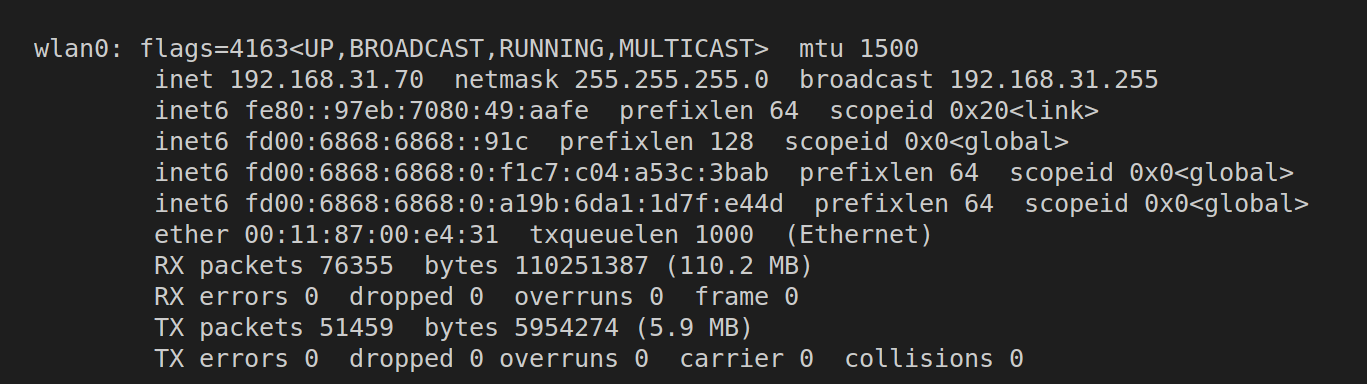

另一种是通过串口使用Ethernet Protocol，jetsonnano使用了static的ipv4地址192.168.55.1（使用以太网）

# 4. 环境配置

 - **安装Python3.8-dev**\
 需要安装相关配件包括pip,以便后续步骤使用.\
`sudo apt-get install python3.8-dev`\
 - **安装必须的pkg**\
 - Step 1. 克隆项目 repo
`git clone https://github.com/ultralytics/yolov5`
 - Step 2. 打开 requirements.txt
`cd yolov5`
`vi requirements.txt`
 - Step 3. 编辑下列行. 首先键入 `i `进入编辑模式. 键入 `ESC`, 再键入 `:wq` 来保存并退出.
>#torch>=1.7.0\
>#torchvision>=0.8.1
    
 * 注意: torch和torchvision被注释了,因为后面会单独安装他们.
 - Step 4. 安装下列依赖
`sudo apt install -y libfreetype6-dev`
 - Step 5. 安装必要的pkg
`pip3 install -r requirements.txt`
 - **安装PyTorch和Torchvision**

我们不能直接安装Pytorch和Torchvision从pip,因为在pip安装的与Jetson Nano(ARM aarch64架构)不匹配.所以我们需要下载Pytorch的wheel来自己编译/安装Torchvision的源码.

*查看 [这个页面](https://forums.developer.nvidia.com/t/pytorch-for-jetson/72048) 来获取所需的版本.*

选择安装PyTorch v1.10.0 ,因为我们这里是 JP4.6.1
file_name: torch-1.10.0-cp36-cp36m-linux_aarch64.whl

URL: https://nvidia.box.com/shared/static/fjtbno0vpo676a25cgvuqc1wty0fkkg6.whl

 - Step 1. 根据Jetpack版本安装Pytorch

```
  cd ~

  sudo apt-get install -y libopenblas-base libopenmpi-dev

  wget https://nvidia.box.com/shared/static/fjtbno0vpo676a25cgvuqc1wty0fkkg6.whl -O torch-   1.10.0-cp36-cp36m-linux_aarch64.whl

  pip3 install torch-1.10.0-cp36-cp36m-linux_aarch64.whl
```
 *下载太慢的话可以直接[从这下载](http://download.pytorch.org/whl/torch/)。*
 - Step 2. 根据Pytorch版本安装Torchvision。
```
 sudo apt install -y libjpeg-dev zlib1g-dev

 git clone --branch v0.11.1 https://github.com/pytorch/vision torchvision

 cd torchvision

 sudo python3 setup.py install
```
[报错点击这里](https://forums.developer.nvidia.com/t/sudo-python3-setup-py-install-illegal-instruction/188607)

# 5. 部署

 - **为YOLOv5配置Deepstream**
 - Step 1. 克隆项目repo
```
cd ~
git clone https://github.com/marcoslucianops/DeepStream-Yolo
```
 - Step 2. 复制 gen_wts_yoloV5.py 从 `DeepStream-Yolo/utils` 到 yolov5 目录下
```
cp DeepStream-Yolo/utils/gen_wts_yoloV5.py yolov5
```
 - Step 3. 进入yolov5,并下载pt文件
 ```
cd yolov5
wget https://github.com/ultralytics/yolov5/releases/download/v6.1/yolov5s.pt
```
 - Step 4. 生成`cfg`和`wts`文件
 ```
python3 gen_wts_yoloV5.py -w yolov5s.pt
```

*注意：改变推理的input尺寸*\
```
-s SIZE
--size SIZE
-s HEIGHT WIDTH
--size HEIGHT WIDTH
```
 - Step 5. 复制生成的`cfg` 和 `wts`文件到`DeepStream-Yolo`文件夹
```
cp yolov5s.cfg ~/DeepStream-Yolo
cp yolov5s.wts ~/DeepStream-Yolo
```
 - Step 6. 打开 `DeepStream-Yolo`文件夹并编译
```
cd ~/DeepStream-Yolo
CUDA_VER=10.2 make -C nvdsinfer_custom_impl_Yolo
```
 - Step 7. 根据模型编辑` config_infer_primary_yoloV5.txt `
```
[property]
...
custom-network-config=yolov5s.cfg
model-file=yolov5s.wts
...}
```
 - Step 8. 根据模型编辑` deepstream_app_config`
 ```
...
[primary-gie]
...
config-file=config_infer_primary_yoloV5.txt
```
 - Step 9. 修改视频源在` deepstream_app_config`文件中。
```
...
[source0]
...
uri=file:///opt/nvidia/deepstream/deepstream/samples/streams/sample_1080p_h264.mp4
```
$\quad$进行推理
```
deepstream-app -c deepstream_app_config.txt
```

 - **FP16 量化**

 - Step 1. 安装OpenCV
```
sudo apt-get install libopencv-dev
```
 - Step 2. 编译` nvdsinfer_custom_impl_Yolo`
 ```
cd ~/DeepStream-Yolo
CUDA_VER=10.2 OPENCV=1 make -C nvdsinfer_custom_impl_Yolo
```
 - Step 3. 对于COCO数据集，下载 [val2017](https://link.zhihu.com/?target=https%3A//github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip),解压并复制到` DeepStream-Yolo`

 - Step 4. 建立新的目录来存放量化需要的图像
```
mkdir calibration
```
 - Step 5. 从中选取随机选取1000张图像(更多的数据可以得到更好的性能)，并进行模型量化
```
for jpg in $(ls -1 val2017/*.jpg | sort -R | head -1000); do \
    cp ${jpg} calibration/; \
done
```

 - Step 6. 为选取的图像创建`calibration.txt` 文件
```
realpath calibration/*jpg > calibration.txt
```

- Step 7. Set environment variables
```
export INT8_CALIB_IMG_PATH=calibration.txt
```
```
export INT8_CALIB_BATCH_SIZE=1
```

    Step 8. 修改`config_infer_primary_yoloV5.txt` 文件
    
$\quad$From
```
...
model-engine-file=model_b1_gpu0_fp32.engine
#int8-calib-file=calib.table
...
network-mode=0
...
```
$\quad$To
```
...
model-engine-file=model_b1_gpu0_fp16.engine
int8-calib-file=calib.table
...
network-mode=2
...
```
 - Step 9. 进行推理
```
deepstream-app -c deepstream_app_config.txt
```

# citation
https://github.com/ultralytics/yolov5/issues/9627

http://download.pytorch.org/whl/torch/

https://forums.developer.nvidia.com/t/sudo-python3-setup-py-install-illegal-instruction/188607

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

启动
![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

功率模式
https://blog.csdn.net/huiyuanliyan/article/details/126421377


# 通信

三种思路：\
        1.直接写一个串口通信，不使用ros[最容易实现，效率高，不可扩展] \
        2. 用rosserial通信，但nano和imx8两个ros master是独立的（不是作为节点）[本质上和1没什么区别] \
        3. 用串口ssh，把nano作为节点接入imx8的master[最合理，但实现难度未知]
         

jetson nano的uUSB会被识别成网卡，进行ssh能否实现3？

实现：1.ros设置了两个节点分别为nano_images负责作为server接收模型检测结果，并将结果解析后发布为topic：BoundingBox.msg;yolov5_model负责调用以yolov5作为nvinfer的deepstream视频处理流，并作为client发送检测结果的BoundingBox。

├── calibration
├── calibration.txt
├── config_infer_primary_ppyoloe.txt
├── config_infer_primary.txt
├── config_infer_primary_yolor.txt
├── config_infer_primary_yoloV2.txt
├── config_infer_primary_yoloV5.txt
├── config_infer_primary_yoloV7.txt
├── deepstream_app_config.txt
├── docs
│   ├── customModels.md
│   ├── multipleGIEs.md
│   ├── multipleGIEs_tree.png
│   ├── PPYOLOE.md
│   ├── YOLOR.md
│   ├── YOLOv5.md
│   └── YOLOv7.md
├── internal_memory.txt
├── labels.txt
├── LICENSE.md
├── model_b1_gpu0_fp16.engine
├── model_b1_gpu0_fp32.engine
├── mylabels.txt
├── nvdsinfer_custom_impl_Yolo
│   ├── calibrator.cpp
│   ├── calibrator.h
│   ├── calibrator.o
│   ├── layers
│   │   ├── activation_layer.cpp
│   │   ├── activation_layer.h
│   │   ├── activation_layer.o
│   │   ├── batchnorm_layer.cpp
│   │   ├── batchnorm_layer.h
│   │   ├── batchnorm_layer.o
│   │   ├── channels_layer.cpp
│   │   ├── channels_layer.h
│   │   ├── channels_layer.o
│   │   ├── cls_layer.cpp
│   │   ├── cls_layer.h
│   │   ├── cls_layer.o
│   │   ├── convolutional_layer.cpp
│   │   ├── convolutional_layer.h
│   │   ├── convolutional_layer.o
│   │   ├── implicit_layer.cpp
│   │   ├── implicit_layer.h
│   │   ├── implicit_layer.o
│   │   ├── pooling_layer.cpp
│   │   ├── pooling_layer.h
│   │   ├── pooling_layer.o
│   │   ├── reduce_layer.cpp
│   │   ├── reduce_layer.h
│   │   ├── reduce_layer.o
│   │   ├── reg_layer.cpp
│   │   ├── reg_layer.h
│   │   ├── reg_layer.o
│   │   ├── reorg_layer.cpp
│   │   ├── reorg_layer.h
│   │   ├── reorg_layer.o
│   │   ├── route_layer.cpp
│   │   ├── route_layer.h
│   │   ├── route_layer.o
│   │   ├── shortcut_layer.cpp
│   │   ├── shortcut_layer.h
│   │   ├── shortcut_layer.o
│   │   ├── shuffle_layer.cpp
│   │   ├── shuffle_layer.h
│   │   ├── shuffle_layer.o
│   │   ├── softmax_layer.cpp
│   │   ├── softmax_layer.h
│   │   ├── softmax_layer.o
│   │   ├── upsample_layer.cpp
│   │   ├── upsample_layer.h
│   │   └── upsample_layer.o
│   ├── libnvdsinfer_custom_impl_Yolo.so
│   ├── Makefile
│   ├── nvdsinfer_yolo_engine.cpp
│   ├── nvdsinfer_yolo_engine.o
│   ├── nvdsparsebbox_Yolo.cpp
│   ├── nvdsparsebbox_Yolo.o
│   ├── utils.cpp
│   ├── utils.h
│   ├── utils.o
│   ├── yolo.cpp
│   ├── yoloForward.cu
│   ├── yoloForward_e.cu
│   ├── yoloForward_e.o
│   ├── yoloForward_nc.cu
│   ├── yoloForward_nc.o
│   ├── yoloForward.o
│   ├── yoloForward_r.cu
│   ├── yoloForward_r.o
│   ├── yoloForward_v2.cu
│   ├── yoloForward_v2.o
│   ├── yolo.h
│   ├── yolo.o
│   ├── yoloPlugins.cpp
│   ├── yoloPlugins.h
│   └── yoloPlugins.o
├── README.md
├── utils
│   ├── gen_wts_ppyoloe.py
│   ├── gen_wts_yolor.py
│   ├── gen_wts_yoloV5.py
│   └── gen_wts_yoloV7.py
├── yolov5s.cfg
└── yolov5s.wts

